<a href="https://colab.research.google.com/github/hellorusk-sandbox/NLP100/blob/master/30_39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install mecab swig libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils swig swig3.0
0 upgraded, 10 newly installed, 0 to remove and 39 not upgraded.
Need to get 30.1 MB of archives.
After this operation, 282 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/u

In [2]:
import requests

res = requests.get("https://nlp100.github.io/data/neko.txt")

with open("neko.txt", "w") as f:
    f.write(res.text)

In [3]:
!mecab neko.txt -o neko.txt.mecab

In [4]:
!head -n 20 neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*


In [5]:
# 30. 形態素解析結果の読み込み

sentences = []
morphemes = []

with open("neko.txt.mecab") as f:
    for line in f:
        tmp = dict()
        input = line.replace("\n", "").split("\t")
        
        if len(input) >= 2:

            tmp["surface"] = input[0]
            content = input[1].split(",")
            tmp["base"] = content[6]
            tmp["pos"] = content[0]
            tmp["pos1"] = content[1]
            morphemes.append(tmp)

        elif input[0] == "EOS":
            sentences.append(morphemes)
            morphemes = []

In [6]:
sentences[:10]

[[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
  {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': ''}],
 [{'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': ''}],
 [{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
  {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
  {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
  {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
  {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': ''}],
 [{'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
  {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
  {'base': '*'

In [7]:
len(sentences)

9964

In [8]:
morphemes = sum(sentences, [])

In [9]:
morphemes[:20]

[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
 {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': ''},
 {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': ''},
 {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': ''},
 {'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
 {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '*', 'pos': '記号', 'pos1

In [10]:
len(morphemes)

216302

In [11]:
# 31. 動詞

[morpheme["surface"] for morpheme in morphemes \
    if morpheme["pos"] == "動詞"]

['生れ',
 'つか',
 'し',
 '泣い',
 'し',
 'いる',
 '始め',
 '見',
 '聞く',
 '捕え',
 '煮',
 '食う',
 '思わ',
 '載せ',
 'られ',
 '持ち上げ',
 'られ',
 'し',
 'あっ',
 '落ちつい',
 '見',
 '見',
 '思っ',
 '残っ',
 'いる',
 'さ',
 'れ',
 'し',
 '逢っ',
 '出会わ',
 'し',
 'のみ',
 'なら',
 'し',
 'いる',
 '吹く',
 'せ',
 '弱っ',
 '飲む',
 '知っ',
 '坐っ',
 'おっ',
 'する',
 'し',
 '始め',
 '動く',
 '動く',
 '分ら',
 '廻る',
 'なる',
 '助から',
 '思っ',
 'いる',
 'さり',
 'し',
 '出',
 'し',
 'いる',
 '考え出そ',
 '分ら',
 '付い',
 '見る',
 'い',
 'おっ',
 '見え',
 '隠し',
 'しまっ',
 '違っ',
 '明い',
 'い',
 'られ',
 '這い出し',
 '見る',
 '棄て',
 'られ',
 '這い出す',
 'ある',
 '坐っ',
 'し',
 '考え',
 '見',
 '出',
 'し',
 '泣い',
 '来',
 'くれる',
 '考え付い',
 'やっ',
 '見',
 '来',
 '渡っ',
 'かかる',
 '減っ',
 '来',
 '泣き',
 '出',
 'ある',
 'ある',
 'し',
 'そろ',
 '廻り',
 '始め',
 'し',
 '這っ',
 '行く',
 '出',
 '這入っ',
 'なる',
 '思っ',
 '崩れ',
 'もぐり込ん',
 '破れ',
 'い',
 'し',
 '知れ',
 '云っ',
 '至る',
 'する',
 'なっ',
 'いる',
 '忍び込ん',
 '分ら',
 'なる',
 '減る',
 '降っ',
 '来る',
 '出来',
 'なっ',
 'あるい',
 '行く',
 '考える',
 '這入っ',
 'おっ',
 '見る',
 'し',
 '逢っ',
 '見る',
 'つかん',
 '抛り出し',
 '思っ',
 'ねぶっ',
 '任せ',
 'い',
 '出来

In [12]:
# 32. 動詞の原形

[morpheme["base"] for morpheme in morphemes \
    if morpheme["pos"] == "動詞"]

['生れる',
 'つく',
 'する',
 '泣く',
 'する',
 'いる',
 '始める',
 '見る',
 '聞く',
 '捕える',
 '煮る',
 '食う',
 '思う',
 '載せる',
 'られる',
 '持ち上げる',
 'られる',
 'する',
 'ある',
 '落ちつく',
 '見る',
 '見る',
 '思う',
 '残る',
 'いる',
 'する',
 'れる',
 'する',
 '逢う',
 '出会う',
 'する',
 'のむ',
 'なる',
 'する',
 'いる',
 '吹く',
 'する',
 '弱る',
 '飲む',
 '知る',
 '坐る',
 'おる',
 'する',
 'する',
 '始める',
 '動く',
 '動く',
 '分る',
 '廻る',
 'なる',
 '助かる',
 '思う',
 'いる',
 'さる',
 'する',
 '出る',
 'する',
 'いる',
 '考え出す',
 '分る',
 '付く',
 '見る',
 'いる',
 'おる',
 '見える',
 '隠す',
 'しまう',
 '違う',
 '明く',
 'いる',
 'られる',
 '這い出す',
 '見る',
 '棄てる',
 'られる',
 '這い出す',
 'ある',
 '坐る',
 'する',
 '考える',
 '見る',
 '出る',
 'する',
 '泣く',
 '来る',
 'くれる',
 '考え付く',
 'やる',
 '見る',
 '来る',
 '渡る',
 'かかる',
 '減る',
 '来る',
 '泣く',
 '出る',
 'ある',
 'ある',
 'する',
 'そる',
 '廻る',
 '始める',
 'する',
 '這う',
 '行く',
 '出る',
 '這入る',
 'なる',
 '思う',
 '崩れる',
 'もぐり込む',
 '破れる',
 'いる',
 'する',
 '知れる',
 '云う',
 '至る',
 'する',
 'なる',
 'いる',
 '忍び込む',
 '分る',
 'なる',
 '減る',
 '降る',
 '来る',
 '出来る',
 'なる',
 'あるく',
 '行く',
 '考える',
 '這入る',
 'おる',
 '見る',
 'する',
 '逢う',
 '見る

In [13]:
# 33. 「AのB」

res = []

for i in range(len(morphemes) - 2):
    b = morphemes[i]
    c = morphemes[i+1]
    e = morphemes[i+2]

    if b["pos"] == "名詞" and \
        c["surface"] == "の" and \
        e["pos"] == "名詞":
        res.append(b["surface"] + c["surface"] + e["surface"])

res

['彼の掌',
 '掌の上',
 '書生の顔',
 'はずの顔',
 '顔の真中',
 '穴の中',
 '書生の掌',
 '掌の裏',
 '何の事',
 '肝心の母親',
 '藁の上',
 '笹原の中',
 '池の前',
 '池の上',
 '一樹の蔭',
 '垣根の穴',
 '隣家の三',
 '時の通路',
 '一刻の猶予',
 '家の内',
 '彼の書生',
 '以外の人間',
 '前の書生',
 'おさんの隙',
 'おさんの三',
 '胸の痞',
 '家の主人',
 '主人の方',
 '鼻の下',
 '吾輩の顔',
 '自分の住',
 '吾輩の主人',
 '家のもの',
 'うちのもの',
 '彼の書斎',
 '本の上',
 '皮膚の色',
 '本の上',
 '彼の毎夜',
 '以外のもの',
 '主人の傍',
 '彼の膝',
 '膝の上',
 '経験の上',
 '飯櫃の上',
 '炬燵の上',
 'ここのうち',
 '供の寝床',
 '彼等の中間',
 '供の一',
 '例の神経',
 '性の主人',
 '次の部屋',
 '自分の勝手',
 '吾輩の方',
 '台所の板の間',
 '吾輩の尊敬',
 '向の白',
 '玉のよう',
 'そこの家',
 '家の書生',
 '裏の池',
 '親子の愛',
 'もっともの議論',
 '刺の頭',
 '鰡の臍',
 '彼等のため',
 '軍人の家',
 '代言の主人',
 '教師の家',
 '猫の時節',
 '吾輩の家',
 '家の主人',
 'だらけの英文',
 '胃弱の癖',
 '後架の中',
 '平の宗',
 '月の月給',
 '当分の間',
 '下のよう',
 '今更のよう',
 '主人の述懐',
 '彼の友',
 '金縁の眼鏡',
 '主人の顔',
 '内の想像',
 '訳のもの',
 '利の大家',
 '金縁の裏',
 '吾輩の後ろ',
 '彼の友',
 '吾輩の輪廓',
 '顔のあたり',
 '上乗の出来',
 '顔の造作',
 '他の猫',
 '不器量の吾輩',
 '吾輩の主人',
 '斯産の猫',
 '斑入りの皮膚',
 '主人の彩色',
 '一種の色',
 '身内の筋肉',
 '主人の予定',
 '座敷の中',
 '悪口の言いよう',
 '人の気',
 '彼の背中',
 'こっちの便利',
 '自

In [14]:
# 34. 名詞の連接

res = []
is_continued = False
tmp = ""

for morpheme in morphemes:
    if is_continued:
        if morpheme["pos"] == "名詞":
            tmp += morpheme["surface"]
        else:
            if tmp != "":
                res.append(tmp)
            is_continued = False
            tmp = ""

    else:
        if morpheme["pos"] == "名詞":
            is_continued = True
            tmp = morpheme["surface"]
        else:
            is_continued = False

if tmp != "":
    res.append(tmp)

res

['一',
 '吾輩',
 '猫',
 '名前',
 'どこ',
 '見当',
 '何',
 '所',
 'ニャーニャー',
 'いた事',
 '記憶',
 '吾輩',
 'ここ',
 '人間',
 'もの',
 'あと',
 'それ',
 '書生',
 '人間中',
 '一番獰悪',
 '種族',
 'そう',
 '書生',
 'の',
 '我々',
 '話',
 '当時',
 '何',
 '考',
 '彼',
 '掌',
 'スー',
 '時',
 '感じ',
 '掌',
 '上',
 '書生',
 '顔',
 'の',
 '人間',
 'もの',
 '始',
 '時妙',
 'もの',
 '感じ',
 '今',
 '一毛',
 '装飾',
 'はず',
 '顔',
 '薬缶',
 'その後猫',
 '輪',
 '一度',
 '事',
 '顔',
 '真中',
 '突起',
 '穴',
 '中',
 'ぷうぷうと煙',
 '咽',
 'これ',
 '人間',
 '煙草',
 'もの',
 '事',
 '頃',
 '書生',
 '掌',
 '裏',
 '心持',
 '非常',
 '速力',
 '運転',
 '書生',
 'の',
 '自分',
 'の',
 '眼',
 '胸',
 '音',
 '眼',
 '火',
 'それ',
 '記憶',
 'あと',
 '何',
 '事',
 '気',
 '書生',
 'たくさん',
 '兄弟',
 '一疋',
 '肝心',
 '母親',
 '姿',
 '上今',
 '所',
 '眼',
 '何',
 '容子',
 '非常',
 '吾輩',
 '藁',
 '上',
 '急',
 '笹原',
 '中',
 'の',
 '思い',
 '笹原',
 '向う',
 '池',
 '吾輩',
 '池',
 '前',
 'これ',
 '分別',
 '書生',
 '迎',
 'ニャー',
 'ニャー',
 '試み',
 '誰',
 '池',
 '上',
 '風',
 '日',
 '暮れ',
 '腹',
 '非常',
 '声',
 '仕方',
 '何',
 '食物',
 '所',
 '決心',
 '池',
 '左',
 '非常',
 'そこ',
 '我慢',
 '無理やり',
 '事',
 '人間',
 '所',
 'ここ',
 '竹垣',
 

In [15]:
# 35. 単語の出現頻度

vocab = dict()

for morpheme in morphemes:
    ct = vocab.get(morpheme["base"], 0)
    vocab[morpheme["base"]] = ct + 1

vocab = sorted(vocab.items(), key=lambda x:x[1], reverse=True)

In [16]:
vocab

[('*', 12155),
 ('の', 9194),
 ('。', 7486),
 ('て', 6848),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5972),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657),
 ('「', 3231),
 ('」', 3225),
 ('ない', 3052),
 ('も', 2479),
 ('ある', 2320),
 ('で', 2084),
 ('から', 2031),
 ('いる', 1777),
 ('ん', 1568),
 ('か', 1529),
 ('云う', 1408),
 ('事', 1207),
 ('です', 1164),
 ('ます', 1146),
 ('なる', 1120),
 ('へ', 1034),
 ('う', 987),
 ('もの', 981),
 ('君', 973),
 ('主人', 932),
 ('ぬ', 719),
 ('よう', 696),
 ('見る', 675),
 ('ね', 657),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('思う', 502),
 ('よ', 502),
 ('吾輩', 481),
 ('来る', 460),
 ('れる', 450),
 ('じゃ', 450),
 ('…', 433),
 ('これ', 414),
 ('\u3000', 411),
 ('さ', 410),
 ('それ', 381),
 ('聞く', 347),
 ('でも', 346),
 ('時', 345),
 ('行く', 340),
 ('出来る', 324),
 ('三', 319),
 ('出る', 317),
 ('な', 317),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('やる', 311),
 ('二', 303),
 ('上', 294),
 ('いい', 294),
 ('寒月', 

     |████████████████████████████████| 4.1MB 2.6MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=a0d0ac76a8096d2096e91dd19750319778fbc683ea9750eba94cec16d9104afc
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


<BarContainer object of 10 artists>

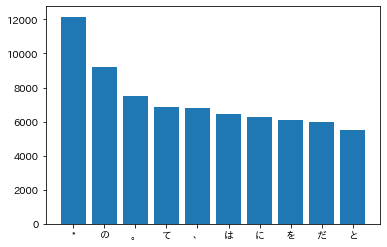

In [17]:
# 36. 頻度上位10語

!pip install japanize-matplotlib

import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline


nums = range(10)
words = [tup[0] for tup in vocab[:10]]
cts = [tup[1] for tup in vocab[:10]]

plt.bar(nums, cts, tick_label=words, align="center")

In [18]:
# 37. 「猫」と共起頻度の高い上位10語

cats = []

for sentence in sentences:
    for mo in sentence:
        if mo["base"] == "猫":
            cats.append(sentence)
            continue 

cats = sum(cats, [])

cat_vocab = dict()

for morpheme in cats:
    if morpheme["base"] != "猫":
        ct = cat_vocab.get(morpheme["base"], 0)
        cat_vocab[morpheme["base"]] = ct + 1

cat_vocab = sorted(cat_vocab.items(), key=lambda x:x[1], reverse=True)     

In [19]:
cat_vocab

[('の', 464),
 ('*', 330),
 ('は', 327),
 ('、', 299),
 ('に', 290),
 ('だ', 279),
 ('を', 260),
 ('て', 255),
 ('。', 236),
 ('と', 233),
 ('が', 216),
 ('する', 162),
 ('た', 153),
 ('ある', 150),
 ('ない', 133),
 ('も', 119),
 ('で', 94),
 ('から', 71),
 ('いる', 68),
 ('事', 67),
 ('吾輩', 64),
 ('ぬ', 55),
 ('か', 51),
 ('人間', 47),
 ('云う', 44),
 ('」', 43),
 ('もの', 42),
 ('この', 40),
 ('ん', 39),
 ('よう', 39),
 ('見る', 39),
 ('「', 37),
 ('なる', 36),
 ('う', 34),
 ('ます', 31),
 ('思う', 31),
 ('その', 28),
 ('れる', 28),
 ('ば', 26),
 ('へ', 25),
 ('一', 24),
 ('主人', 23),
 ('くらい', 23),
 ('出来る', 22),
 ('人', 22),
 ('まで', 21),
 ('そう', 19),
 ('など', 19),
 ('より', 18),
 ('いう', 17),
 ('君', 16),
 ('上', 16),
 ('ところ', 16),
 ('さえ', 16),
 ('御', 16),
 ('\u3000', 15),
 ('でも', 15),
 ('何', 15),
 ('じゃ', 15),
 ('二', 15),
 ('ながら', 14),
 ('やる', 14),
 ('三', 14),
 ('だけ', 13),
 ('です', 13),
 ('さ', 13),
 ('心', 13),
 ('等', 12),
 ('として', 12),
 ('顔', 12),
 ('しかし', 12),
 ('家', 12),
 ('だって', 12),
 ('先生', 12),
 ('来る', 11),
 ('これ', 11),
 ('ごとし', 11),
 ('中', 

<BarContainer object of 10 artists>

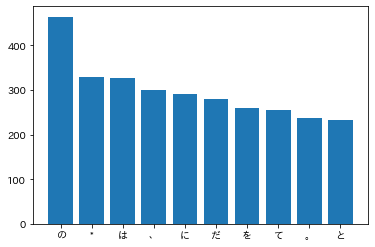

In [20]:
nums = range(10)
words = [tup[0] for tup in cat_vocab[:10]]
cts = [tup[1] for tup in cat_vocab[:10]]

plt.bar(nums, cts, tick_label=words, align="center")

(array([8.640e+03, 1.176e+03, 4.730e+02, 2.360e+02, 1.400e+02, 9.600e+01,
        7.700e+01, 5.400e+01, 3.600e+01, 2.400e+01, 2.400e+01, 1.900e+01,
        2.000e+01, 1.600e+01, 1.500e+01, 1.000e+01, 1.400e+01, 1.300e+01,
        1.000e+01, 1.000e+01, 5.000e+00, 5.000e+00, 4.000e+00, 5.000e+00,
        5.000e+00, 7.000e+00, 2.000e+00, 2.000e+00, 5.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00]),
 array([  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,
         66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120., 126.,
        132., 138., 144., 150., 156., 162., 168., 174., 180., 186., 192.,
        198., 204., 210., 216., 222., 228., 234., 240., 246., 252., 258.,
        264., 270., 276., 282., 288., 294., 300.]),
 <a list of 50 Patch objects

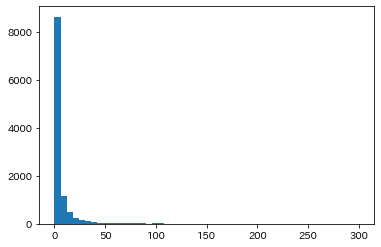

In [21]:
# 38. ヒストグラム

cts = [tup[1] for tup in vocab]
plt.hist(cts, range=(0, 300), bins=50)

In [22]:
# 39. Zipfの法則

import numpy as np
cts = np.array(cts)
rank = np.argsort(-cts) + 1

In [23]:
cts[:20]

array([12155,  9194,  7486,  6848,  6772,  6420,  6243,  6071,  5972,
        5508,  5337,  4267,  3657,  3231,  3225,  3052,  2479,  2320,
        2084,  2031])

In [24]:
rank[:20]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

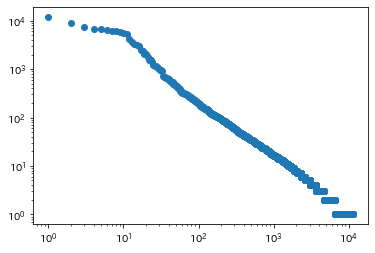

In [25]:
plt.xscale("log")
plt.yscale("log")

plt.scatter(rank, cts)